In [1]:
import os
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#for classification_report
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import precision_recall_fscore_support
from tabulate import tabulate

from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score

In [2]:
!pip install catboost
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

In [3]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

no_cat = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent',
    'Churn'
]

feature_cols = num_cols + cat_cols
col_count = len(feature_cols)
unique_cat = []
target_col = 'Churn'
error_col = 'TotalSpent'

In [4]:
# DATA IMPORT

data = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/train.csv')
# похоже в этом столбце некорректный формат данных
data[error_col] =  pd.to_numeric(data[error_col], errors='coerce')
data.fillna(1., inplace=True)

# numeric data settings
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [5]:
# print(list(data[error_col]))

In [6]:
# DATASET SPLIT

y = data[target_col]

features_list = list(data)
features_list.remove(target_col)

X = data[features_list]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, 
                                                                train_size=0.75, 
                                                                random_state=42)

# X_submis = X_submis.to_numpy()

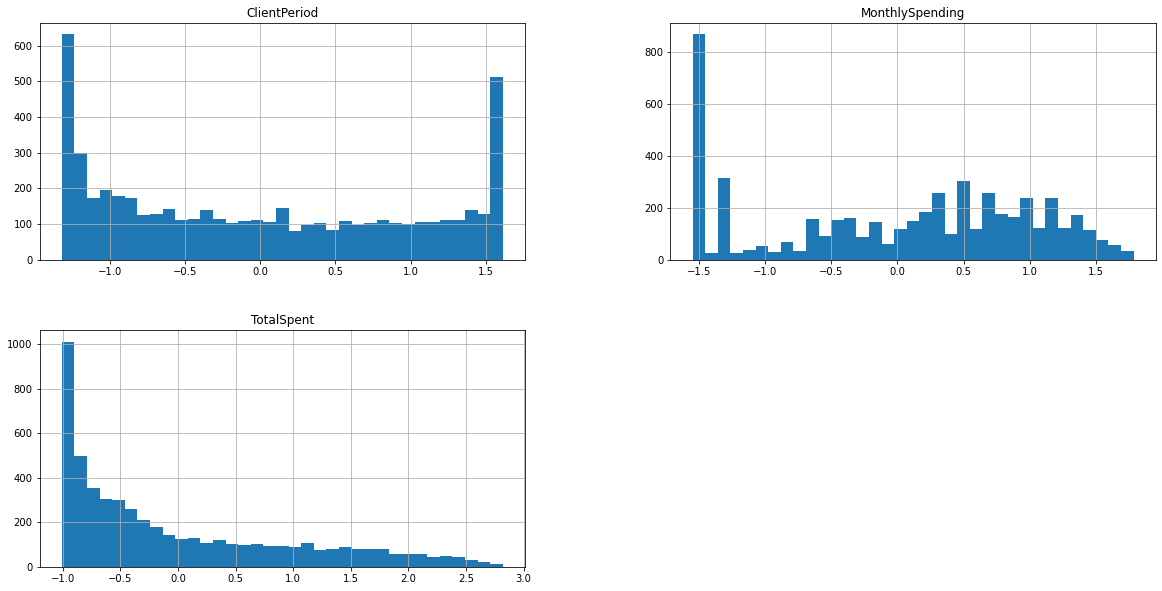

In [7]:
data[num_cols].hist(bins=35, figsize=(20, 10))
plt.show()

In [8]:
# model = CatBoostClassifier(
#     custom_loss=[metrics.Accuracy()],
#     random_seed=42,
#     logging_level='Silent'
# )

In [9]:
model = CatBoostClassifier(cat_features=cat_cols, verbose=False)
model.fit(X_train, y_train)

In [10]:
predictions = model.predict(X_validation)
predictions_probs = model.predict_proba(X_validation)[:, -1]


In [11]:
X_validation.shape

(1321, 19)

In [12]:
predictions_probs.shape

(1321,)

In [13]:
roc_auc_score(y_validation, predictions_probs)

0.8227270773463021

In [14]:
# params = {
#     'iterations': 500,
# #     'learning_rate': 0.1,
#     'eval_metric': metrics.Accuracy(),
#     'random_seed': 42,
#     'logging_level': 'Silent',
#     'use_best_model': False
# }
# train_pool = Pool(X_train, y_train, cat_features=cat_cols)
# validate_pool = Pool(X_validation, y_validation, cat_features=cat_cols)

In [15]:
# model = CatBoostClassifier(**params)
# model.fit(train_pool, eval_set=validate_pool)

# best_model_params = params.copy()
# best_model_params.update({
#     'use_best_model': True
# })
# best_model = CatBoostClassifier(**best_model_params)
# best_model.fit(train_pool, eval_set=validate_pool);

# print('Simple model validation accuracy: {:.4}'.format(
#     accuracy_score(y_validation, model.predict(X_validation))
# ))
# print('')

# print('Best model validation accuracy: {:.4}'.format(
#     accuracy_score(y_validation, best_model.predict(X_validation))
# ))

In [16]:
# model.fit(
#     X_train, y_train,
#     cat_features=cat_cols,
#     eval_set=(X_validation, y_validation),
#     logging_level='Verbose',  # you can uncomment this for text output
#     plot=True
# );

In [17]:
X_submis = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/test.csv')
X_submis[error_col] =  pd.to_numeric(X_submis[error_col], errors='coerce')
median = X_submis[error_col].sum()//len(X_submis[error_col])
# X_submis = X_submis.fillna(median)
X_submis.fillna(1., inplace=True)

X_submis[num_cols] = scaler.fit_transform(X_submis[num_cols])

In [18]:
# cv_params = model.get_params()
# cv_params.update({
#     'loss_function': metrics.Logloss()
# })
# cv_data = cv(
#     Pool(X, y, cat_features=cat_cols),
#     cv_params,
#     plot=True
# )

In [19]:
# print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
#     np.max(cv_data['test-Accuracy-mean']),
#     cv_data['test-Accuracy-std'][np.argmax(cv_data['test-Accuracy-mean'])],
#     np.argmax(cv_data['test-Accuracy-mean'])
# ))

In [20]:
# print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-Accuracy-mean'])))

In [21]:
predictions = model.predict(X_submis)
predictions_probs = model.predict_proba(X_submis)[:, -1]

In [22]:
new_df = pd.DataFrame(predictions_probs)
print(predictions_probs.shape)

(1761,)


In [23]:
submission = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/submission.csv')

In [24]:
submission[target_col] = new_df
os.chdir('/kaggle/working/')
submission.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [25]:
pd.read_csv('/kaggle/working/submission.csv').head()

,Id,Churn
0,0,0.049842
1,1,0.801252
2,2,0.626593
3,3,0.014770
4,4,0.002160
